    LAB 3       DATE:26 AUG 2025             NAME:AAYUSH SUTHAR         REG.NO: 23FE10CAI00275


                    ~ Lab Report:    Decision Tree for Housing Classification

    ~ Objective:
Train a Decision Tree model to classify houses as Expensive or Cheap based on features like area and number of bedrooms.

1 To build a Decision Tree Regression model to predict housing prices.  
2 To understand the impact of outliers and feature scaling on model performance.  
3 To visualize decision trees and interpret predictions.

   ~ Observations:  

1 The tree splits based on the most informative features first (area or bedrooms).   
2 Maximum depth = 3 ensures the tree doesn’t overfit.  
3 Accuracy depends on the dataset; small datasets may give perfect accuracy but not generalize well.  
4 Feature selection affects the interpretability and performance of the tree.


   ~ Learning Outcomes:   

1 Understand the concept and components of decision trees.  
2 Prepare and split data for training and testing.  
3 Train a Decision Tree model using scikit-learn.  
4 Evaluate model performance with accuracy and confusion matrix.  
5 Visualize the decision tree to interpret decisions.  
6 Understand effects of tree depth and feature selection on performance.  


    ~ Conclusion:
    
Decision Trees are easy to interpret and visualize.
They can handle non-linear data relationships.
Pruning (max_depth, min_samples_split) is important to prevent overfitting.


First 5 rows of dataset:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Accuracy: 0.7562984496124031

Confusion Matrix:
 [[2004  382]
 [ 624 1118]]

Classification Report:
               precision    recall  f1-score   support

       Cheap       0.76      0.84      0.80      2386
   Expensive       0.75      0.64      0.69      1742

    accuracy                           0.76      4128
   macro avg       0.75      0

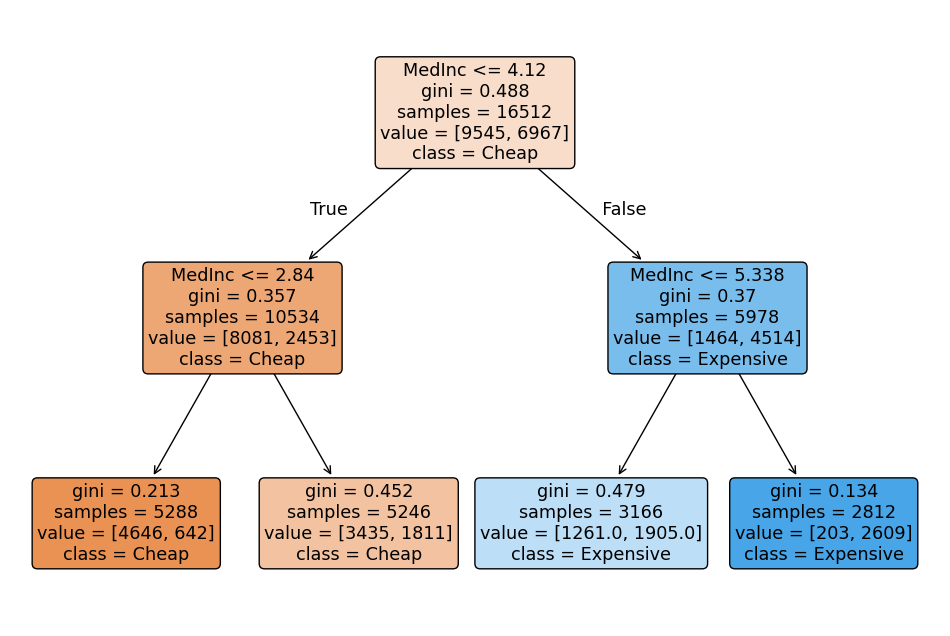

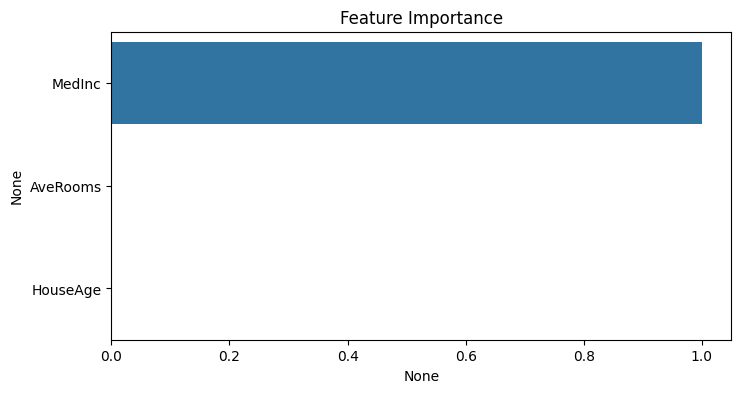

In [1]:
'''Lab Report: Decision Tree for Housing Classification

Objective:
Train a Decision Tree Classifier to classify houses as Expensive or Cheap.
Evaluate performance using accuracy, confusion matrix, and classification report.
Visualize the Decision Tree and feature importance.'''

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_california_housing

# 2. Load Dataset
california = fetch_california_housing(as_frame=True)
df = california.frame
# Display first 5 rows
df.head()

print("First 5 rows of dataset:\n", df.head())

# 3. Create Target Variable: Expensive / Cheap
df['PriceCategory'] = df['MedHouseVal'].apply(lambda x: 'Expensive' if x > 2.0 else 'Cheap')

# 4. Select only the top 3 features for simplicity
X = df[['MedInc', 'AveRooms', 'HouseAge']]
y = df['PriceCategory']

# 5. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Train small Decision Tree
dt_small = DecisionTreeClassifier(random_state=42, max_depth=2, min_samples_leaf=200)
dt_small.fit(X_train, y_train)

# 7. Predict
y_pred = dt_small.predict(X_test)

# 8. Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

# 9. Visualize Tree
plt.figure(figsize=(12,8))
plot_tree(dt_small, feature_names=X.columns, class_names=dt_small.classes_, filled=True, rounded=True)
plt.show()

# 10. Feature Importance
importance = pd.Series(dt_small.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=importance, y=importance.index)
plt.title('Feature Importance')
plt.show()

# -------------------------------------------------------
# Note:
# If you face any issues or have questions regarding this lab,
# please contact the author:
# Name: Aayush Suthar
# Reg. No: 23FE10CAI00275
# Email: aayushsuthar5115@gmail.com
# -------------------------------------------------------



First 5 rows of dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Accuracy: 0.9333333333333333

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93

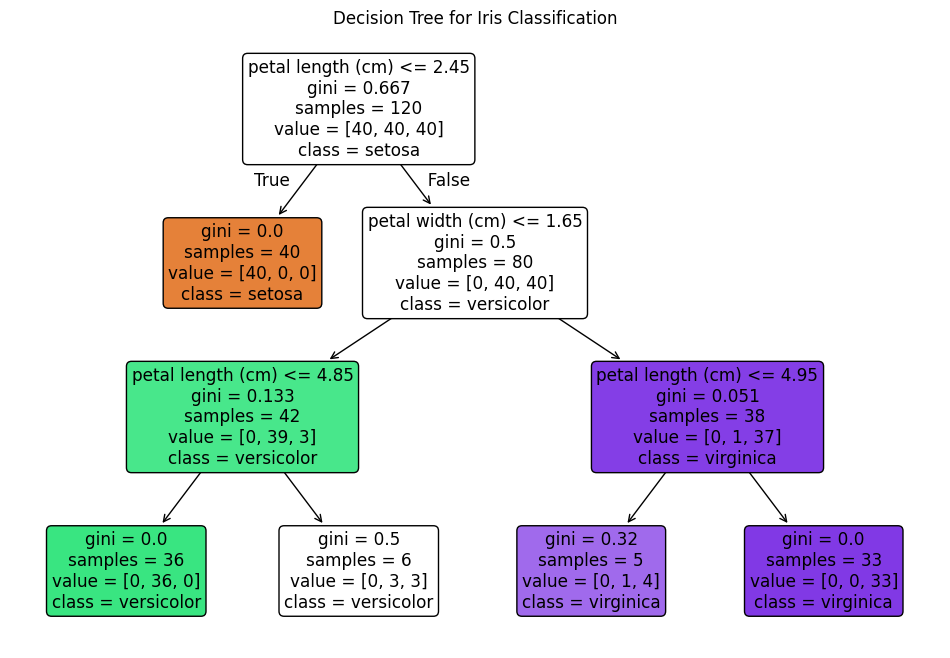

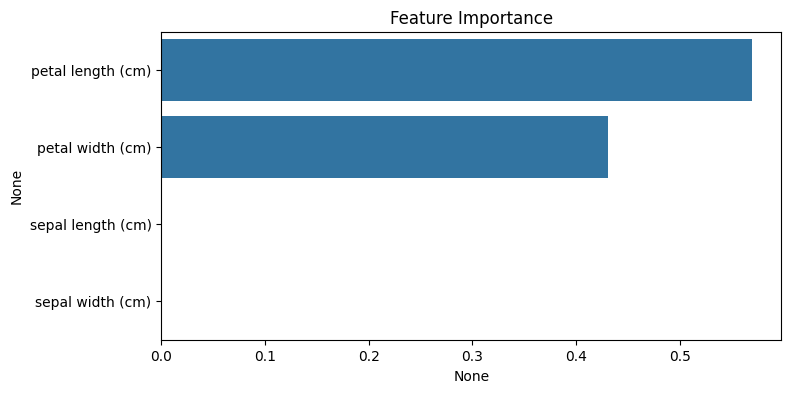

In [2]:
'''
Lab 3: Decision Tree for Iris Classification
Date: 26 AUG 2025
Name: Aayush Suthar
Reg. No: 23FE10CAI00275

Objective:
1. Train a Decision Tree Classifier to classify Iris flowers into 3 species: setosa, versicolor, virginica.
2. Evaluate model performance using accuracy, confusion matrix, and classification report.
3. Visualize the Decision Tree and feature importance.
'''

# 1. Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)  # Feature columns
df['Species'] = iris.target                               # Target column (0,1,2)
df['Species'] = df['Species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})  # Map numeric to species names

# Preview dataset
print("First 5 rows of dataset:\n", df.head())

# 3. Prepare Features and Target
X = df[iris.feature_names]  # Features
y = df['Species']           # Target

# 4. Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Train Decision Tree Classifier
# - max_depth=3 ensures tree is small and interpretable
# - min_samples_leaf=5 avoids tiny splits and overfitting
dt = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=5)
dt.fit(X_train, y_train)

# 6. Make Predictions on Test Set
y_pred = dt.predict(X_test)

# 7. Evaluate Model
accuracy = accuracy_score(y_test, y_pred)               # Overall accuracy
cm = confusion_matrix(y_test, y_pred)                  # Confusion matrix
cr = classification_report(y_test, y_pred)            # Precision, Recall, F1-score

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

# 8. Visualize the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(
    dt, 
    feature_names=iris.feature_names, 
    class_names=dt.classes_, 
    filled=True, 
    rounded=True
)
plt.title("Decision Tree for Iris Classification")
plt.show()

# 9. Feature Importance
importance = pd.Series(dt.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=importance, y=importance.index)
plt.title('Feature Importance')
plt.show()

# 10. Note for Users
# If you face any issues or have questions regarding this lab,
# please contact the author:
# Name: Aayush Suthar
# Reg. No: 23FE10CAI00275
# Date: 26 AUG 2025
